In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from PlotFunction import plot_decision_surface

In [2]:
param = "best"
paramSet = {
    "firstTry": {"eta0": 0.01, "n_iter_no_change": 3, "random_state": 5},
    "best": {"eta0": 0.1, "n_iter_no_change": 10, "random_state": 1},
}

In [3]:
dataObj = datasets.load_iris()

In [4]:
print(dataObj.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(dataObj.feature_names)
print(dataObj.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [6]:
df = pd.DataFrame(dataObj.data, columns=dataObj.feature_names)
df['target'] = dataObj.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [8]:
df2 = df

In [9]:
X = df2.iloc[:,[2,3]].values
y = df2.iloc[:,4].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [11]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
ppn = Perceptron(
    eta0=paramSet[param]["eta0"],
    random_state=paramSet[param]["random_state"],
    verbose=1,
    n_iter_no_change=paramSet[param]["n_iter_no_change"],
)

In [13]:
# Training
ppn.fit(X_train_std, y_train)

-- Epoch 1
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 105, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 210, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 315, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 420, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 525, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 630, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 735, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 840, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 945, Avg. loss: 0.000000
Total training time: 0.00 s

Perceptron(eta0=0.1, n_iter_no_change=10, random_state=1, verbose=1)

In [14]:
# Prediction
y_pred = ppn.predict(X_test_std)


In [15]:
# Misclassification from the test samples
sumMiss = (y_test != y_pred).sum()

In [16]:
# Accuracy score from the test samples
accuracyScore = accuracy_score(y_test, y_pred)

In [17]:
print(f"Misclassified examples: {sumMiss}")
print(f"Accuracy score: {accuracyScore}")

Misclassified examples: 1
Accuracy score: 0.9777777777777777


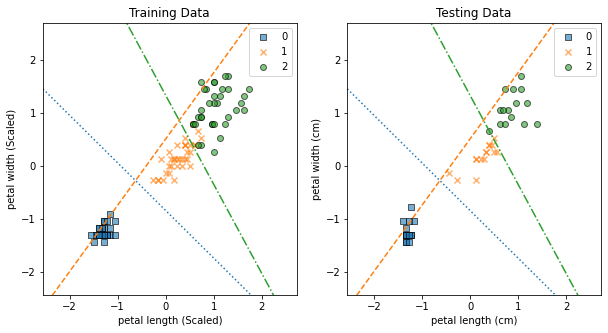

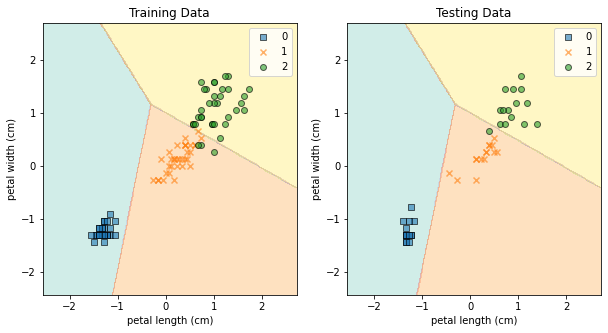

In [18]:
plot_decision_surface(X_train_std, X_test_std, y_train, y_test, ppn, filename="T1_Perceptron.png")